In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


2023-10-17 19:28:44.368724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 19:28:44.420276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 19:28:44.420323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 19:28:44.420367: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 19:28:44.430662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 19:28:44.431159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Load your dataset
data = pd.read_csv('/home/aniket/Downloads/AAPL.csv')

# Clean the data (if needed)
# You may want to drop unnecessary columns
data = data[['date', 'close']]

# Convert 'date' to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data['close'] = scaler.fit_transform(data['close'].values.reshape(-1, 1))


In [3]:
print(data.head(10))

                              close
date                               
2015-05-27 00:00:00+00:00  0.176074
2015-05-28 00:00:00+00:00  0.174956
2015-05-29 00:00:00+00:00  0.168623
2015-06-01 00:00:00+00:00  0.169699
2015-06-02 00:00:00+00:00  0.167272
2015-06-03 00:00:00+00:00  0.167947
2015-06-04 00:00:00+00:00  0.164739
2015-06-05 00:00:00+00:00  0.161741
2015-06-08 00:00:00+00:00  0.158152
2015-06-09 00:00:00+00:00  0.156548


In [4]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Define the sequence length (e.g., 30 days)
sequence_length = 30

# Create sequences
X, y = create_sequences(data['close'], sequence_length)


In [5]:
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


2023-10-17 19:31:18.778994: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/50
31/31 [==============================] - 2s 11ms/step - loss: 0.0440
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 4/50
31/31 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 5/50
31/31 [==============================] - 0s 12ms/step - loss: 8.5612e-04
Epoch 6/50
31/31 [==============================] - 0s 12ms/step - loss: 6.1776e-04
Epoch 7/50
31/31 [==============================] - 0s 11ms/step - loss: 5.3406e-04
Epoch 8/50
31/31 [==============================] - 0s 11ms/step - loss: 5.0223e-04
Epoch 9/50
31/31 [==============================] - 0s 11ms/step - loss: 4.7167e-04
Epoch 10/50
31/31 [==============================] - 0s 11ms/step - loss: 4.8544e-04
Epoch 11/50
31/31 [==============================] - 0s 11ms/step - loss: 4.0756e-04
Epoch 12/50
31/31 [==============================] - 0s 13ms/step - loss: 3.7378e-04
Epoch

In [11]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)  # Reshape y_test to be a 2D array
y_test = scaler.inverse_transform(y_test)


8/8 [==============================] - 0s 5ms/step


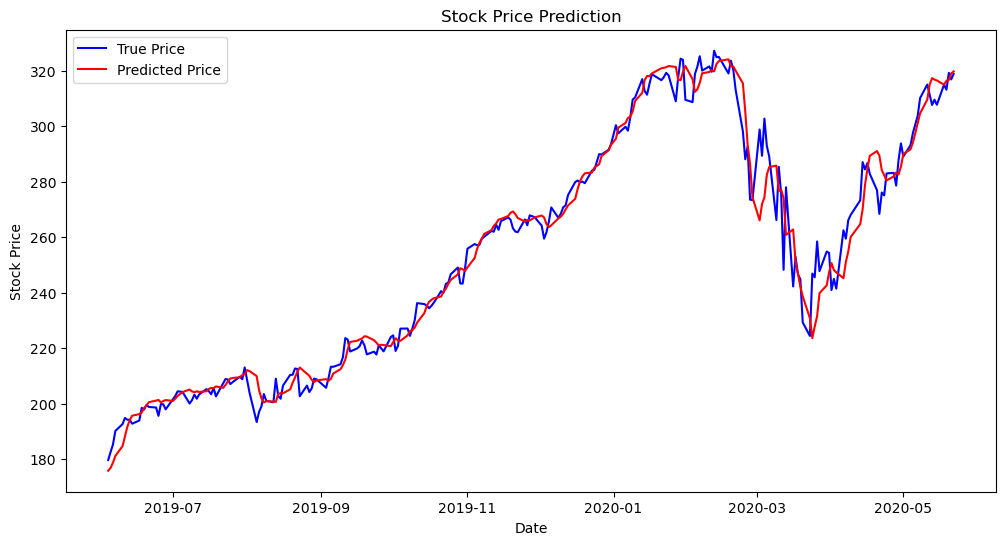

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='True Price', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()
